# Proyecto: Análisis mercado inmobiliario de la Ciudad de Buenos Aires

¡Bienvenidos al primer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo es dar los primeros pasos en el proceso de exploración de datos usando las herramientas que trabajamos en las activades.

Vamos a enfocarnos en analizar algunos aspectos del mercado inmobiliario de la Ciudad de Buenos Aires pero para eso primero debemos limpiar un poco el dataset.

## El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 

## Los atributos
A continuación vamos a describir los atributos que consideramos en esta muestra:

* **id**: id de la propiedad
* **created_on**: fecha en la que la propiedad ingresó al sitio
* **operation**: alquiler (rent) o venta (sell)
* **property_type**: tipo de propiedad (casa, departamento, ph, etcétera)
* **place_with_parent_names**: nombre del lugar donde se encuentra la propiedad según el publicador
* **lat-lon**: coordenadas concatenadas
* **lat**: latitud
* **lon**: longitud
* **price**: precio en la moneda especificada en currency
* **currency**: divisa en la que está expresada la publicación
* **price_aprox_usd**: precio aproximado en dólares estadounidenses
* **surface_total_in_m2**: superficie total (en metros cuadrados)
* **surface_covered_in_m2**: superficie cubierta (en metros cuadrados)
* **price_usd_per_m2**: precio por metro cuadrado en dólares (precio dólares / superficie)
* **floor**: número de piso (si corresponde)
* **rooms**: cantidad de ambientes
* **expenses**: expensas (si corresponde)
* **barrio**: barrio según cartografía oficial
* **properati_url**: url de la publicación en Properati


## Importando las bibliotecas necesarias

Para poder trabajar en la limpieza de datos y la visualización de nuestro dataset vamos a utilizar las bibliotecas numpy, pandas, matplotlib.pylab y seaborn. 

** 1) Importá ** cada una de ellas con los siguientes nombres: 
- **numpy** como **np**
- **pandas** como **pd**
- **matplotlib.pylab** como **plt**
- **seaborn** como **sns**


In [1]:
# Importar bibliotecas en esta celda
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## Cargando dataset de propiedades

**2) Cargá** el dataset que se encuentra en la carpeta *dataset/* y guardalo en una variable llamada **df**. 
No te olvides de utilizar **parse_dates** sobre la columna **created_on**


In [4]:
# cargá el dataset en esta celda
df = pd.read_csv('dataset/datos_properati.csv')
df

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.00,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.00,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.00,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.00,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.00,30.0,30.0,4000.000000,1.0,NaN,NaN,https://www.properati.com.ar/1cw7a_venta_local_palermo_av-santa-fe_5300_garage_subte-linea-d_solucion-inmobiliaria_gx3,PALERMO,14.0
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.00,26.0,NaN,3846.153846,NaN,NaN,NaN,https://www.properati.com.ar/1d36i_venta_local_belgrano_dumont-santos_2400_luminoso_impecable_subte-linea-d_urbana-consultores-inmobiliarios,PALERMO,14.0
7,2017-08-11,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5729833,-58.4388579",-34.572983,-58.438858,390000.00,57.0,57.0,6842.105263,NaN,NaN,NaN,https://www.properati.com.ar/1d3k8_venta_local_palermo_cabildo-av-_200_garage_estrenar_subte-linea-d_triada-propiedades,PALERMO,14.0
8,2017-08-12,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.00,48.0,48.0,2291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1d5sl_venta_local_palermo_zappone-inmobiliaria,PALERMO,14.0
9,2017-08-15,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.00,20.0,20.0,2500.000000,NaN,NaN,NaN,https://www.properati.com.ar/1d86m_venta_local_palermo_santa-fe-av-_4400_subte-linea-d_gaed-inmobiliaria,PALERMO,14.0


## Exploración de datos

Lo primero que vamos a hacer es ver qué forma tiene el dataset que acabamos de cargar. Para eso vamos a mostrar las primeras 3 entradas del mismo y utilizar la propiedad `shape` para ver la cantidad de instancias y atributos con los que vamos a estar trabajando.

In [5]:
print(df.shape)
df.head(3)

(18979, 17)


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.25641,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.92562,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.47541,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0


## Categorías de propiedades
En primer lugar vamos a ver qué categorías existen en el campo `property_type`. Y de esas categorías cuantos valores tenemos de cada uno.

**3) Mostrá** las categorías de `property_type` y cuántas instancias hay de cada una.

Recordá utilizar funciones del **dataframe** de pandas para realizar esto.

In [38]:
# mostrá las categorías del campo property_type y mostrá la cant. de valores en esta celda
pt = pd.DataFrame(df['property_type'])
index = pd.Index(pt)
index.value_counts()

(apartment,)    14807
(house,)         1618
(PH,)            1463
(store,)         1091
dtype: int64

### Filtrando las categorías

De las categorías existentes sólo queremos quedarnos con las que sean casas (house), departamentos (apartment) o PH (PH). 

Para esto, 

**4) filtrá** el `dataframe` original creando un **nuevo** `dataframe` llamado `df_filtered`. Este es el `dataframe` que seguirás usando a lo largo del análisis.


In [40]:
# Filtrá el dataframe en esta celda
df_filtered = pd.DataFrame(df)

### Visualizando las categorías
**5)** Utilizando `seaborn` **creá un countplot** para visualizar las categorías de `df_filtered` en el campo `property_type` 

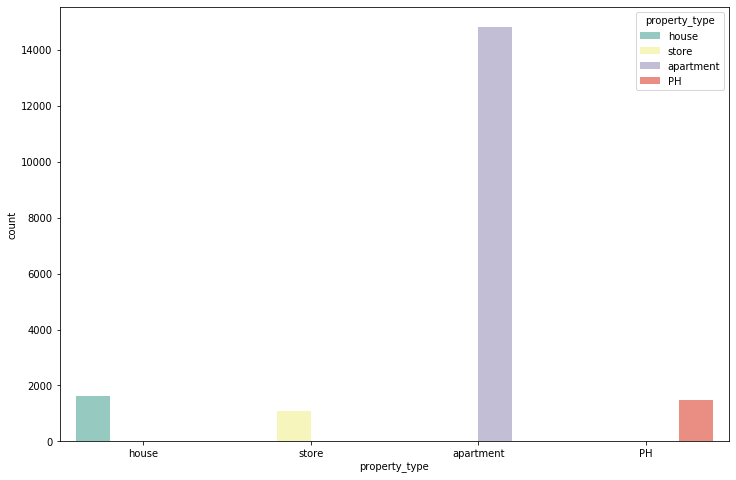

In [53]:
# Visualizá las categorías en esta celda
#prop = sns.load_dataset(df_filtered['property_type'])
cppt = sns.countplot(x="property_type", hue="property_type", palette="Set3", data=pd.DataFrame(df_filtered['property_type']))


## Valores Faltantes

Vamos a querer descartar aquellas instancias que tengan valores nulos en columnas importantes para el análisis del mercado.
Estas columnas son las que informan **superficie (total o cubierta)**, **cantidad de ambientes**, **precio** y **precio por metro cuadrado**.

**6) Quitá** del `dataframe` las instancias que no tengan ningún valor en los campos nombrados.

In [55]:
# Quitá las instancias con valores nules en esta celda
df_filtered.dropna()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
137,2017-09-10,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5708522,-58.4411794",-34.570852,-58.441179,270000.0,185.0,80.0,1459.459459,1.0,3.0,5400.0,https://www.properati.com.ar/1el0x_venta_departamento_belgrano_maure-2324_suite_lavadero_patio_luminoso_lujoso_garage_impecable_losa-radiante_doble-circulacion_subte-linea-d_santiago-jannot-capital,PALERMO,14.0
140,2017-09-10,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5832058,-58.4334675",-34.583206,-58.433468,123000.0,32.0,29.0,3843.750000,3.0,1.0,2600.0,https://www.properati.com.ar/1el2s_venta_departamento_palermo-hollywood_humboldt-al-1900_balcon_parrilla_terraza_luminoso_placard_aire-acondicionado_innovar-grupo-inmobiliario,PALERMO,14.0
176,2017-09-13,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5630665,-58.4383467",-34.563066,-58.438347,268000.0,82.0,74.0,3268.292683,7.0,3.0,6400.0,https://www.properati.com.ar/1epbt_venta_departamento_belgrano_lacroze-federico-av-1620_balcon_luminoso_lujoso_dependencias_santiago-jannot-capital,PALERMO,14.0
177,2017-09-13,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5630665,-58.4383467",-34.563066,-58.438347,268000.0,84.0,76.0,3190.476190,7.0,3.0,6400.0,https://www.properati.com.ar/1epbu_venta_departamento_belgrano_lacroze-federico-av-1620_balcon_luminoso_lujoso_dependencias_santiago-jannot-capital,PALERMO,14.0
180,2017-09-13,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5808658,-58.4384065",-34.580866,-58.438406,312000.0,98.0,91.0,3183.673469,2.0,4.0,9500.0,https://www.properati.com.ar/1epdp_venta_departamento_palermo_ravignani-emilio-2268_balcon_suite_lavadero_parrilla_piscina_sum_luminoso_lujoso_garage_subte-linea-d_loria-inmobiliaria,PALERMO,14.0
181,2017-09-13,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5772535,-58.4344262",-34.577253,-58.434426,312000.0,98.0,91.0,3183.673469,2.0,4.0,9500.0,https://www.properati.com.ar/1epdq_venta_departamento_palermo-hollywood_ravignani-emilio-2268_balcon_suite_lavadero_parrilla_piscina_sum_luminoso_lujoso_garage_subte-linea-d_loria-inmobiliaria,PALERMO,14.0
433,2017-10-04,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.568856,-58.4470661",-34.568856,-58.447066,120000.0,39.0,39.0,3076.923077,6.0,2.0,1200.0,https://www.properati.com.ar/1fsdy_venta_departamento_belgrano_aguilar-2400_balcon_subte-linea-d_mr-inmuebles_akd,PALERMO,14.0
511,2017-10-11,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5863377,-58.4201762",-34.586338,-58.420176,230000.0,89.0,85.0,2584.269663,6.0,4.0,4000.0,https://www.properati.com.ar/1g5kv_venta_departamento_palermo_malabia-2277_balcon_jardin_lavadero_toilette_subte-linea-d_pablo-yaryura-propiedades_bly,PALERMO,14.0
731,2017-10-21,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Chico|,"-34.5749864,-58.4206108",-34.574986,-58.420611,435000.0,100.0,86.0,4350.000000,10.0,3.0,8000.0,https://www.properati.com.ar/1hbpm_venta_departamento_palermo-chico_oro-fray-justo-santamaria-de-al-2900_balcon_suite_hidromasaje_piscina_toilette_luminoso_garage_subte-linea-d_bullrich-propiedades,PALERMO,14.0
732,2017-10-21,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5757047033,-58.434499746",-34.575705,-58.434500,191000.0,92.0,47.0,2076.086957,3.0,2.0,2050.0,https://www.properati.com.ar/1hbtd_venta_departamento_palermo_arevalo-2386_balcon_suite_parrilla_patio_luminoso_lujoso_garage_impecable_placard_estrenar_subte-linea-d_apto-credito-hipotecario_loria-inmobiliaria,PALERMO,14.0


**7)** A continuación **mostrá** cuantas instancias son las que descartaste a partir de quitar las que tenían valores nulos.

In [56]:
# Mostrá en esta celda la cantidad de instancias descartadas
df_filtered.isna().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd             1534
surface_total_in_m2         2393
surface_covered_in_m2       2103
price_usd_per_m2            2942
floor                      16223
rooms                       5462
expenses                   15164
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

Posiblemente existan otros atributos con valores faltantes en el dataset, pero que no son de tanta importancia. 

**8) Mostrá** qué otros atributos tienen valores faltantes en el `dataframe`.

In [176]:
# Mostrá en esta celda los otros atributos con valores faltant
df_filtered['surface_total_in_m2'].fillna(0)

2        122.0
5         30.0
6         26.0
8         48.0
9         20.0
11        70.0
12       193.0
13        84.0
14       185.0
15        76.0
18       130.0
20        70.0
21       130.0
22       532.0
24        67.0
25        72.0
29        67.0
31        40.0
35        64.0
37        47.0
38        38.0
39        52.0
40       239.0
42       200.0
43       168.0
44        27.0
52        44.0
53       230.0
55       119.0
56        58.0
         ...  
18924    195.0
18925     86.0
18926     37.0
18927     38.0
18928     95.0
18929     44.0
18931     92.0
18932     84.0
18933     69.0
18934     58.0
18935     66.0
18936     25.0
18939     98.0
18941     90.0
18942    102.0
18943     65.0
18944     73.0
18946    200.0
18948     37.0
18949     62.0
18952    102.0
18953     98.0
18954     50.0
18955     55.0
18956     55.0
18959    180.0
18960     50.0
18961    260.0
18962     60.0
18963     55.0
Name: surface_total_in_m2, Length: 12833, dtype: float64

#### Desafío: planteá alguna estrategia posible para reemplazar los valores faltantes en el atributo `surface_total_in_m2`.

## Datos erróneos

El siguiente paso es analizar errores que puede llegar a haber en el dataset. 

Por ejemplo, la **superficie total no puede ser menor que la cubierta**. Si esto sucede, podemos optar por eliminar esas filas o intentar corregir el problema. Veamos en primer lugar si esto sucede.

**9) Mostrá** cuantas instancias existen que tengan el problema de este dato erróneo y guardalas en una variable llamada `wrong_surface_rows`

In [97]:
# Mostrá en esta celda cuántas instancias tienen errores en la superficie
wrong_surface_rows = df_filtered[df_filtered['surface_total_in_m2'] < df_filtered['surface_covered_in_m2']]
wrong_surface_rows.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
106,2017-09-07,sell,house,|Argentina|Capital Federal|Belgrano|,"-34.566867,-58.444197",-34.566867,-58.444197,1650000.0,455.0,456.0,3626.373626,NaN,5.0,NaN,https://www.properati.com.ar/1ehbq_venta_casa_belgrano_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_toilette_vestidor_luminoso_lujoso_garage_impecable_subte-linea-d_re-max-win,PALERMO,14.0
153,2017-09-12,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5830704,-58.4241896",-34.583070,-58.424190,140000.0,39.0,44.0,3589.743590,NaN,1.0,NaN,https://www.properati.com.ar/1en9l_venta_departamento_palermo_luminoso_estrenar_subte-linea-d_mavia-propiedades,PALERMO,14.0
657,2017-10-17,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5827102814,-58.4268853069",-34.582710,-58.426885,307300.0,59.0,63.0,5208.474576,NaN,NaN,NaN,https://www.properati.com.ar/1gyrq_venta_departamento_palermo-soho_baulera_gimnasio_parrilla_piscina_sum_terraza_luminoso_vista_sauna_garage_amoblado_amenities_aire-acondicionado_estrenar_losa-radiante_subte-linea-d_devoto-citi,PALERMO,14.0
935,2017-11-06,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5869532,-58.4189032",-34.586953,-58.418903,275000.0,13.0,79.0,21153.846154,1.0,4.0,NaN,https://www.properati.com.ar/1htrv_venta_departamento_palermo_scalabrini-ortiz-av-r-_2300_baulera_patio_toilette_dependencias_garage_bengochea-propiedades,PALERMO,14.0
1174,2017-11-22,sell,house,|Argentina|Capital Federal|Palermo|,"-34.583652,-58.444111",-34.583652,-58.444111,930000.0,205.0,343.0,4536.585366,NaN,5.0,NaN,https://www.properati.com.ar/1ibt5_venta_casa_palermo_balcon_lavadero_parrilla_patio_terraza_garage_re-max-total-iv,PALERMO,14.0


Proponemos no borrar estas instancias erróneas, sino intercambiar los valores de **superficie total** con **superficie cubierta** en caso de que se cumpla la condición mencionada.

In [101]:
df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df_filtered.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2
# ya no existe filas con valores incorrectos
df_filtered[df_filtered['surface_total_in_m2'] < df_filtered['surface_covered_in_m2']]

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna


Por otro lado, sucede que las inmobiliarias cuando no cuentan con las coordenadas reales de las propiedades utilizan valores que no son correctos. Por ejemplo, el punto centro de cada barrio o puntos de interés como el Obelisco. Esto puede afectar el análisis relacionado con la ubicación de cada propiedad.

Veamos en primer lugar si hay coordenadas que se repiten.

In [82]:
conteo_puntos = df_filtered.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).head(10)

lat         lon       
-34.589546  -58.397364    160
-34.571150  -58.423297    128
-34.562084  -58.456686     91
-34.620928  -58.445874     49
-34.609821  -58.392606     47
-34.622973  -58.439913     41
-34.608608  -58.448515     40
-34.603771  -58.381587     37
-34.617719  -58.362056     36
-34.621184  -58.373116     33
dtype: int64

Por ejemplo, para el caso del tercer punto, se puede verificar que corresponde a la esquina de Av. Cabildo y Juramento.
Nos quedamos entonces con las propiedades con coordenadas que se repitan hasta 5 veces.

In [110]:
conteo_puntos.name = 'conteo'

df_filtered = df_filtered.join(conteo_puntos, on=['lat', 'lon'])

df_filtered = df_filtered[df_filtered.conteo <= 5]

Eliminamos el atributo `conteo` dado que ya no nos sirve.

In [111]:
df_filtered.drop('conteo', inplace=True, axis=1)

## Estudiando los barrios

### Barrios con más edificios y barrios con más casas
Al saber qué barrios son los que tienen más cantidad de edificios en venta y cuáles son los que tienen más casas podemos darnos una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. 
Para eso vamos a empezar calculando los porcentajes de cada tipo de propiedad según el barrio.

In [113]:
total_propiedades = df_filtered.groupby('barrio')['property_type'].count().values
total_propiedades

array([  57,  717,  924,  211, 1018,  136,  173,  919,  174,  117,  263,
        256,  726,  197,  342,  217,  384,  160,  103,  375, 2143,  128,
        203,   89,  147,   88,  277, 1394,  565,  258,  205,  502,  197,
        147,   73,  582,  217,  307,  138,  130,  206,  148,  143,   52,
         26,   98,   16,  484])

In [114]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

In [116]:
print("Barrios con mayor porcentaje de edificios: \n", porcentaje_edificios.sort_values()[::-1][:5])
print("Barrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Barrios con mayor porcentaje de edificios: 
 barrio
PUERTO MADERO    0.971119
RECOLETA         0.945481
RETIRO           0.883186
PALERMO          0.875408
BELGRANO         0.874263
Name: property_type, dtype: float64
Barrios con mayor porcentaje de casas y phs: 
  barrio
VILLA RIACHUELO      0.730769
VERSALLES            0.643836
MATADEROS            0.589862
PARQUE AVELLANEDA    0.554688
NUEVA POMPEYA        0.553398
Name: property_type, dtype: float64


Para darnos una idea de las diferencias entre los porcentajes de edificios y casas en estos barrios, vamos a graficarlos
en forma de torta.

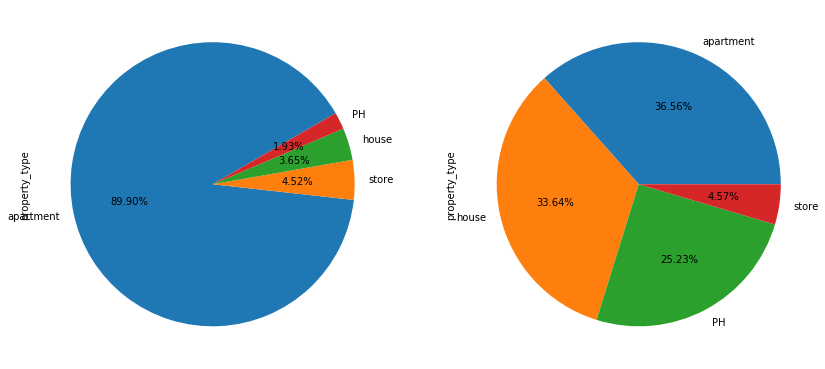

In [117]:
barrios_casas = porcentaje_casas_ph.sort_values()[::-1][:5].index
barrios_edificios = porcentaje_edificios.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

### Barrios más caros y más baratos

Veamos primero la distribución del precio por metro cuadrado para todo el dataset. De esta manera, vamos a remover valores que consideremos extremos.

En el siguiente proyecto vamos a volver sobre este tema con más profundidad.

**10)** Tomando el atributo `price_usd_per_m2` **calculá** su **mínimo**, **máximo**, **promedio (mean)**, **mediana (median)** y **desvío estándar (std)**

In [181]:
# Mostrá en esta celda los cálculos
df_filtered.dropna()
min = df_filtered['price_usd_per_m2'].min()
max = df_filtered['price_usd_per_m2'].max()
mean = df_filtered['price_usd_per_m2'].mean()
median = df_filtered['price_usd_per_m2'].median()
std = df_filtered['price_usd_per_m2'].std()

print("Valor Minimo", min)
print("Valor Maximo", max)
print("Promedio", mean)
print("Mediana", median)
print("Desvio estandar", std)

Valor Minimo 1481.4814814814815
Valor Maximo 4067.796610169493
Promedio 2584.7275272312486
Mediana 2545.436363636364
Desvio estandar 615.3190268519706


También podemos calcular otros estadísticos como los cuartiles. 

**11) Mostrá** el **primer y tercer cuartil** y luego también el **rango intercuartilíco**

In [130]:
# Mostrá los cuartiles en esta celda
df_filtered['price_usd_per_m2'].quantile(.1)
df_filtered['price_usd_per_m2'].quantile(.3)
df_filtered['price_usd_per_m2'].quantile()

2500.0

**Rango intercuartilico IQR**

In [132]:
rango = df_filtered['price_usd_per_m2'].max() - df_filtered['price_usd_per_m2'].min()
iqr = df_filtered['price_usd_per_m2'].quantile(0.75) - df_filtered['price_usd_per_m2'].quantile(0.25)
print("Rango Intercuartilíco", iqr)

Rango Intercuartilíco 1207.792207792208


### Quitando valores extremos
Eliminemos aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intentaremos remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [167]:
df = pd.read_csv('dataset/datos_properati.csv')
df_filtered = pd.DataFrame(df)
p10 = np.percentile(df_filtered.price_usd_per_m2.dropna(), 10)
p90 = np.percentile(df_filtered.price_usd_per_m2.dropna(), 90)
print("Valor Minimo", p10)
print("Valor Maximo", p90)
df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]
df_filtered

Valor Minimo 1481.4814814814815
Valor Maximo 4068.1289464938523


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.00,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.00,30.0,30.0,4000.000000,1.0,NaN,NaN,https://www.properati.com.ar/1cw7a_venta_local_palermo_av-santa-fe_5300_garage_subte-linea-d_solucion-inmobiliaria_gx3,PALERMO,14.0
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.00,26.0,NaN,3846.153846,NaN,NaN,NaN,https://www.properati.com.ar/1d36i_venta_local_belgrano_dumont-santos_2400_luminoso_impecable_subte-linea-d_urbana-consultores-inmobiliarios,PALERMO,14.0
8,2017-08-12,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.00,48.0,48.0,2291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1d5sl_venta_local_palermo_zappone-inmobiliaria,PALERMO,14.0
9,2017-08-15,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.00,20.0,20.0,2500.000000,NaN,NaN,NaN,https://www.properati.com.ar/1d86m_venta_local_palermo_santa-fe-av-_4400_subte-linea-d_gaed-inmobiliaria,PALERMO,14.0
11,2017-08-16,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.584198,-58.4152675",-34.584198,-58.415268,170000.00,70.0,70.0,2428.571429,NaN,NaN,2800.0,https://www.properati.com.ar/1dcnv_venta_local_barrio-norte_arenales_3800_subte-linea-d_zuker-servicios-inmobiliarios_gsp,PALERMO,14.0
12,2017-08-16,sell,store,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5841882044,-58.4431635937",-34.584188,-58.443164,360000.00,193.0,176.0,1865.284974,NaN,NaN,NaN,https://www.properati.com.ar/1dd77_venta_local_palermo-hollywood_balcon_lavadero_terraza_metro-estudio-inmobiliario,PALERMO,14.0
13,2017-08-18,sell,store,|Argentina|Capital Federal|Palermo|,"-34.577645,-58.433104",-34.577645,-58.433104,219000.00,84.0,84.0,2607.142857,NaN,NaN,NaN,https://www.properati.com.ar/1di5h_venta_local_palermo_subte-linea-d_re-max-ra-iacute-ces,PALERMO,14.0
14,2017-08-26,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5699614,-58.4323397",-34.569961,-58.432340,685000.00,185.0,185.0,3702.702703,NaN,NaN,NaN,https://www.properati.com.ar/1dv8b_venta_local_belgrano_subte-linea-d_maxi-totah-operaciones-inmobiliarias_e2l,PALERMO,14.0
15,2017-08-26,sell,store,|Argentina|Capital Federal|Palermo|,"-34.573524,-58.4405828",-34.573524,-58.440583,248675.00,76.0,76.0,3272.039474,NaN,NaN,NaN,https://www.properati.com.ar/1dw79_venta_local_palermo_matienzo-benjamin-2489_subte-linea-d_aguero-vera-propiedades,PALERMO,14.0


A partir de quitar estos valores van a cambiar los estadísticos que calculamos.

**12) Volvé a calcular** los mismos estadísticos (min, max, promedio, etc) para ver los cambios.
¿Por qué será que la **mediana** no cambia?

In [182]:
# Realizá los calculos en esta celda

min = df_filtered['price_usd_per_m2'].min()
max = df_filtered['price_usd_per_m2'].max()
mean = df_filtered['price_usd_per_m2'].mean()
median = df_filtered['price_usd_per_m2'].median()
std = df_filtered['price_usd_per_m2'].std()

print("Valor Minimo", min)
print("Valor Maximo", max)
print("Promedio", mean)
print("Mediana", median)
print("Desvio estandar", std)

Valor Minimo 1481.4814814814815
Valor Maximo 4067.796610169493
Promedio 2584.7275272312486
Mediana 2545.436363636364
Desvio estandar 615.3190268519706


Vamos a graficar ahora los barrios según el precio por metro cuadrado.

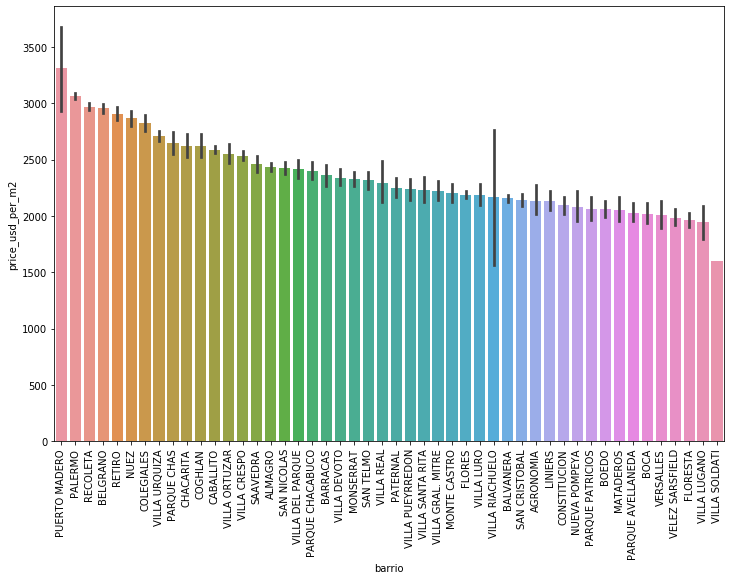

In [169]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

#### Más caros

In [170]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

,price_usd_per_m2
barrio,
PUERTO MADERO,6156.633183
PALERMO,3632.057960
RETIRO,3417.635657
RECOLETA,3346.748987
BELGRANO,3338.725206


#### Más baratos

In [171]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.825753
VILLA LUGANO,1179.846071
VILLA RIACHUELO,1274.809950
PARQUE AVELLANEDA,1386.260577
NUEVA POMPEYA,1539.235869


## Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:
- Superficie total en m2
- Cuartos totales 
- Precio en dolares por m2

In [172]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index

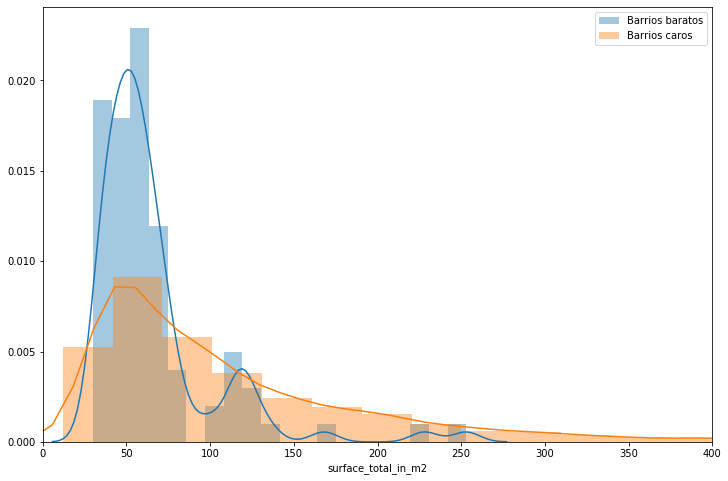

In [173]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].surface_total_in_m2, label="Barrios caros")
g.set_xlim(0, 400)
plt.legend()

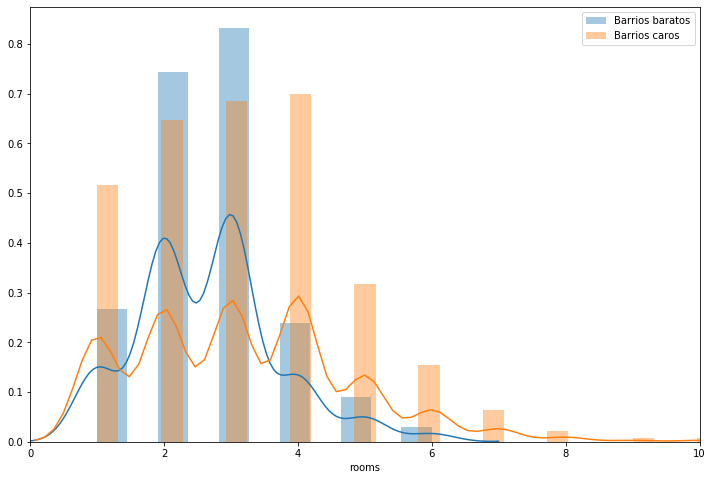

In [183]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].rooms.dropna(), label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].rooms.dropna(), label="Barrios caros")
g.set_xlim(0, 10)
plt.legend()

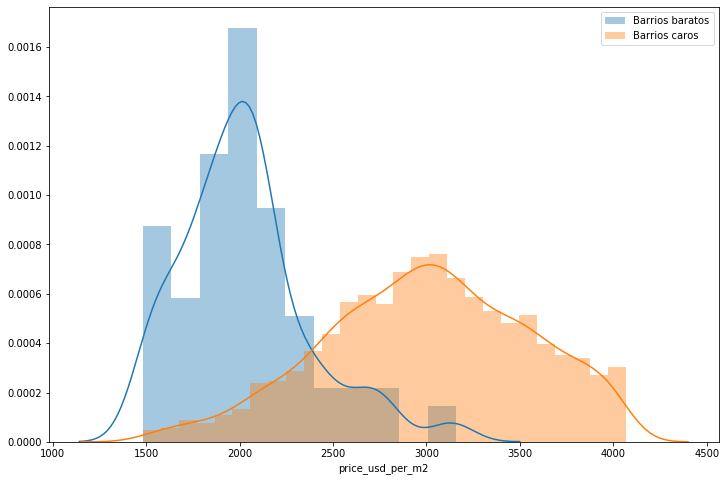

In [175]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].price_usd_per_m2, label="Barrios caros")
plt.legend()

### Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota ([blog)](http://blog.properati.com.ar/barrios-que-quieren-ser-otros/), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.

Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo `place_with_parent_names`, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada `barrio_publicado`. 

De este modo, lo que vamos a analizar es como se relacionan las columnas `barrio` y `barrio publicado`. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por `|`. Por ejemplo, en `|Argentina|Capital Federal|Palermo|` vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo). 

De este modo, una estrategia posible para resolver esto es separar las jerarquías por `|` y extraer el elemento asociado al barrio. Por ejemplo, para `|Argentina|Capital Federal|Palermo|` queda `['', 'Argentina', 'Capital Federal', 'Palermo', '']`. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.

In [184]:
df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))).unique()

array([6, 5, 4])

Como algunos tienen 4 elementos, debemos quitarlos.

In [185]:
split_place_filter = df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_filtered = df_filtered.loc[split_place_filter]

In [187]:
df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_filtered['barrio_publicado'] = df_filtered['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

/home/willy.aguirre/anaconda2/envs/acamica/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/willy.aguirre/anaconda2/envs/acamica/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde nos coincidan para luego hacer el conteo por barrio.

In [188]:
barrios_match = (df_filtered['barrio_publicado'] != df_filtered['barrio'])
df_filtered_barrio_not_match = df_filtered.loc[barrios_match]

Con una tabla de doble entrada podemos identificar para cada barrio cuál es al que más quiere parecerse.

In [189]:
table = pd.crosstab(df_filtered_barrio_not_match.barrio, df_filtered_barrio_not_match.barrio_publicado)
table.idxmax(axis=1)

barrio
AGRONOMIA                VILLA PUEYRREDON
ALMAGRO                           PALERMO
BALVANERA                            ONCE
BARRACAS                        SAN TELMO
BELGRANO                            NUNEZ
BOCA                             BARRACAS
BOEDO                    PARQUE PATRICIOS
CABALLITO               PARQUE CENTENARIO
CHACARITA                      COLEGIALES
COGHLAN                          BELGRANO
COLEGIALES                       BELGRANO
CONSTITUCION                    SAN TELMO
FLORES                          CABALLITO
FLORESTA                           FLORES
LINIERS                        VILLA LURO
MATADEROS                         LINIERS
MONSERRAT                       SAN TELMO
MONTE CASTRO                 VILLA DEVOTO
NUEVA POMPEYA            PARQUE PATRICIOS
NUEZ                                NUNEZ
PALERMO                          BELGRANO
PARQUE AVELLANEDA                FLORESTA
PARQUE CHACABUCO                CABALLITO
PARQUE CHAS                

Podemos ver entonces que los barrios tienden a querer parecerse a barrios con precio con metro cuadrado más caro. Por ejemplo Villa Crespo con Palermo, Constitución con San Telmo y Villa Urquiza con Belgrano. 

Por otro lado, vemos también que los barrios suelen querer parecerse a sus barrios vecinos.